<a href="https://colab.research.google.com/github/kamrulhasan04947/mlprac/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


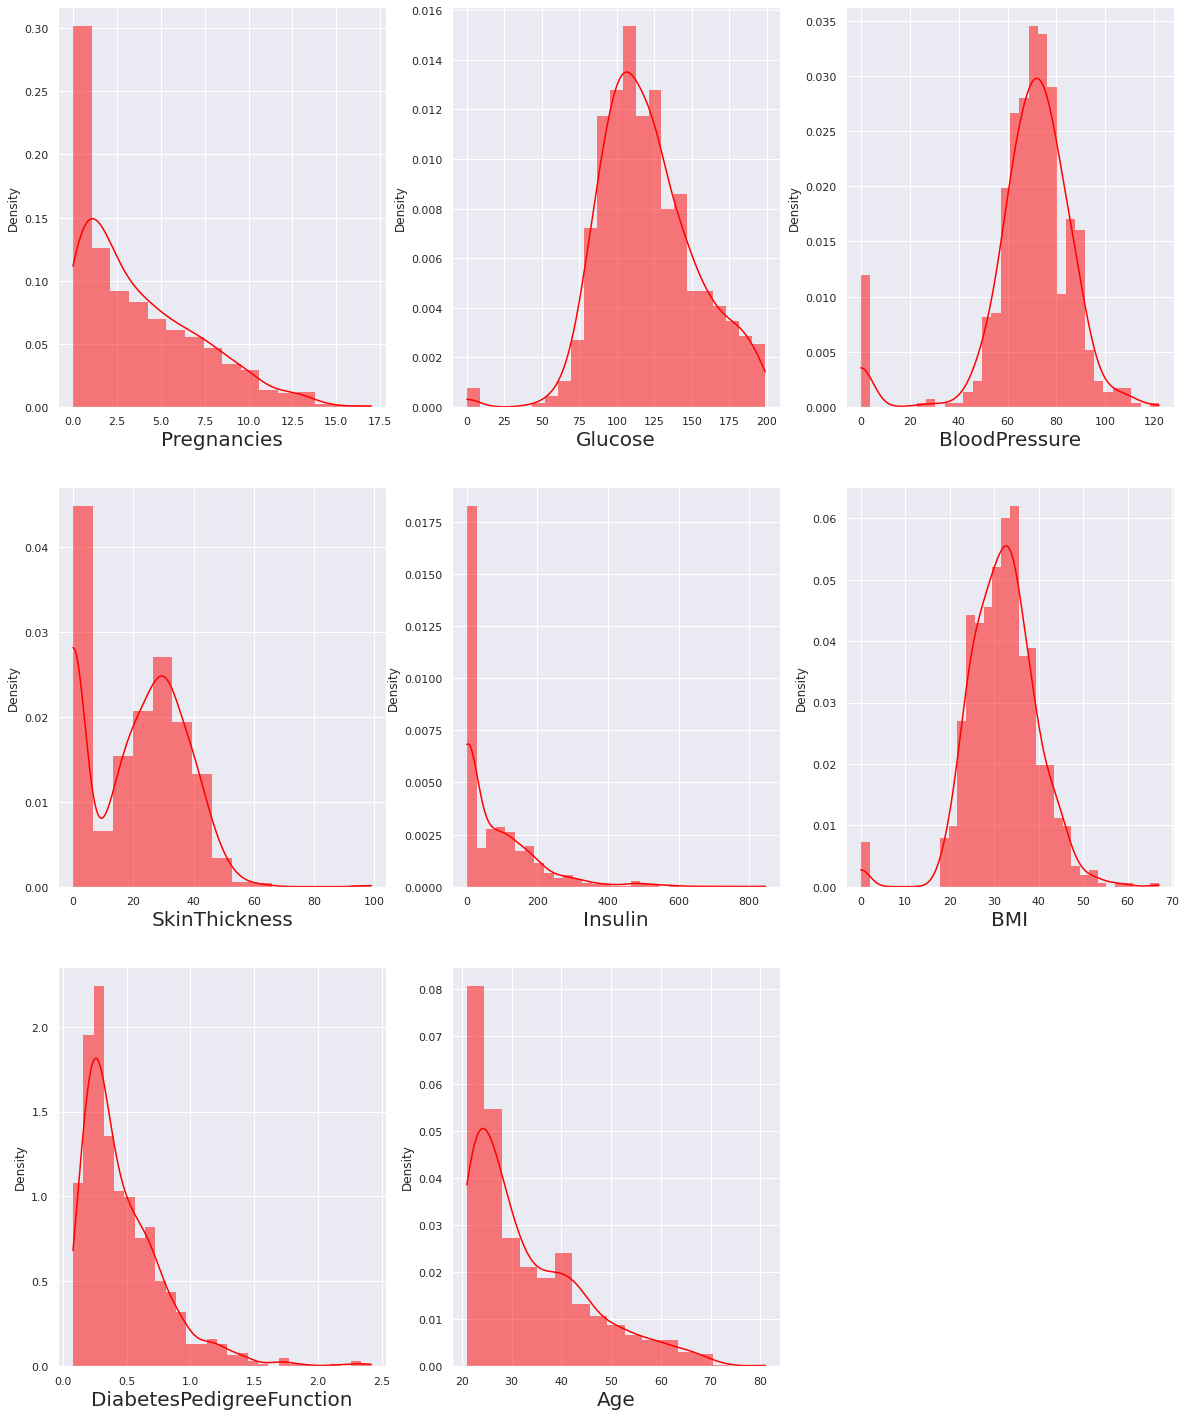

In [ ]:
plt.figure(figsize=(20, 25), facecolor='white')
plotNumber = 1
for column in data:
  if plotNumber < 9:
    ax = plt.subplot(3, 3, plotNumber)
    sns.histplot(data[column], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.xlabel(column, fontsize=20)
  plotNumber +=1
plt.show()

In [ ]:
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


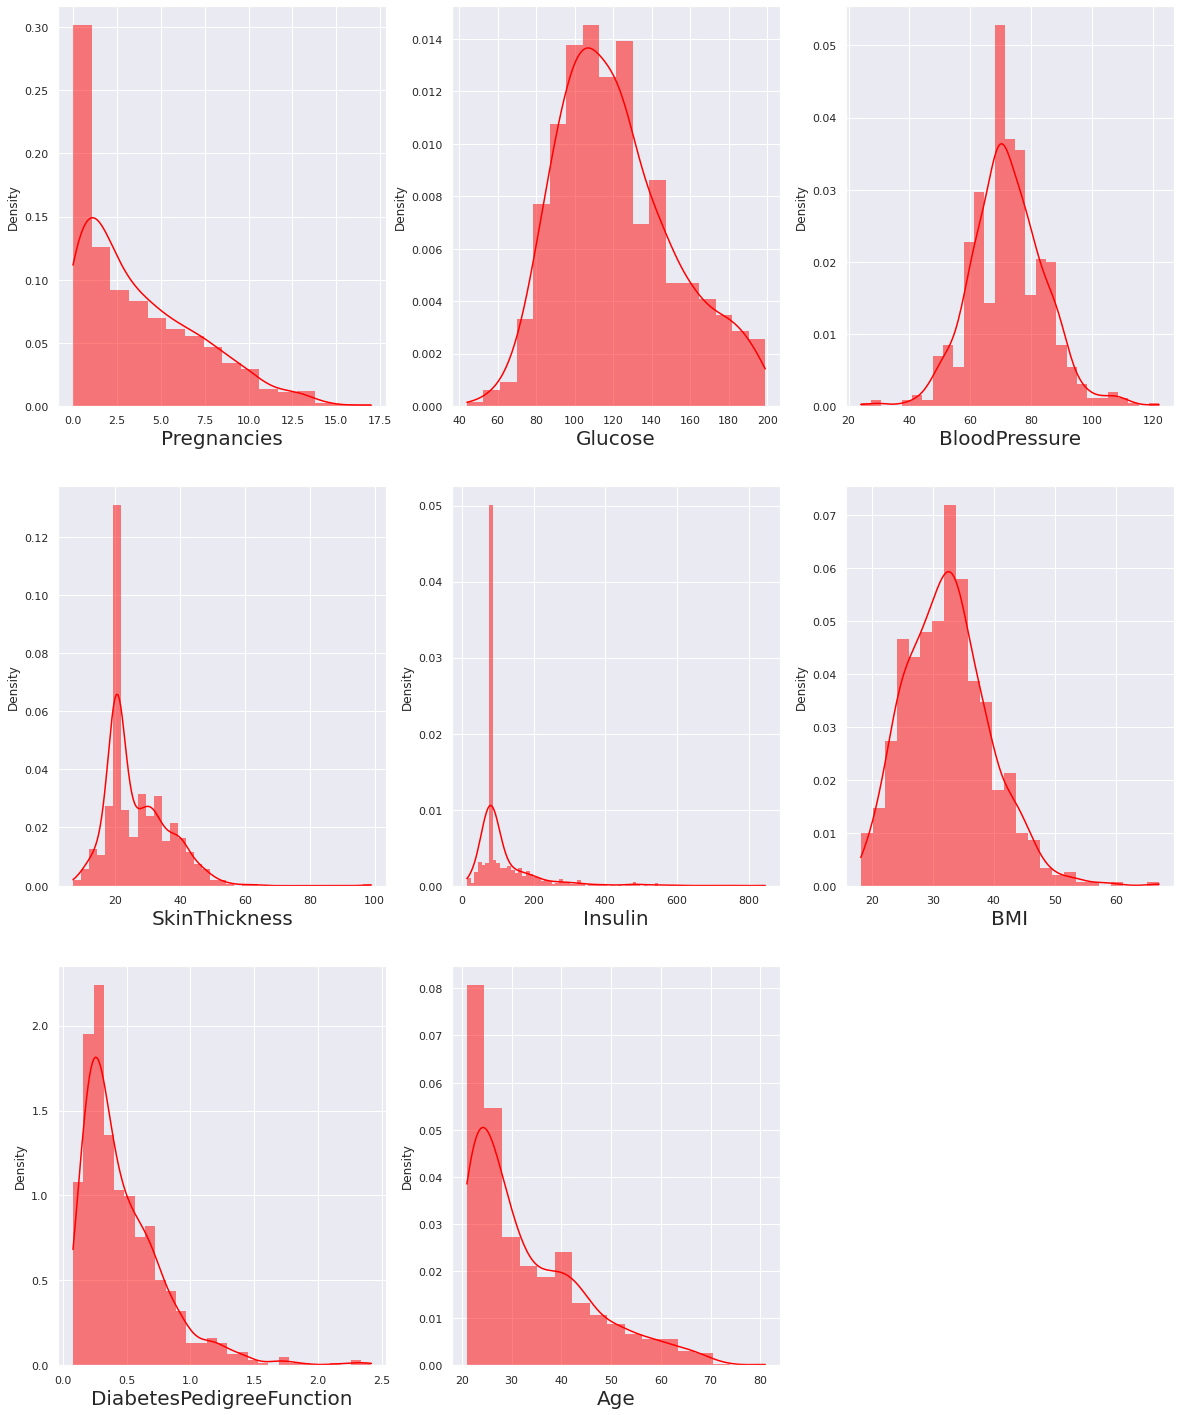

In [ ]:
plt.figure(figsize=(20, 25), facecolor='white')
plotNumber = 1

for column in data:
  if plotNumber < 9:
    ax = plt.subplot(3, 3, plotNumber)
    sns.histplot(data[column], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.xlabel(column, fontsize=20)
  plotNumber +=1
plt.show()

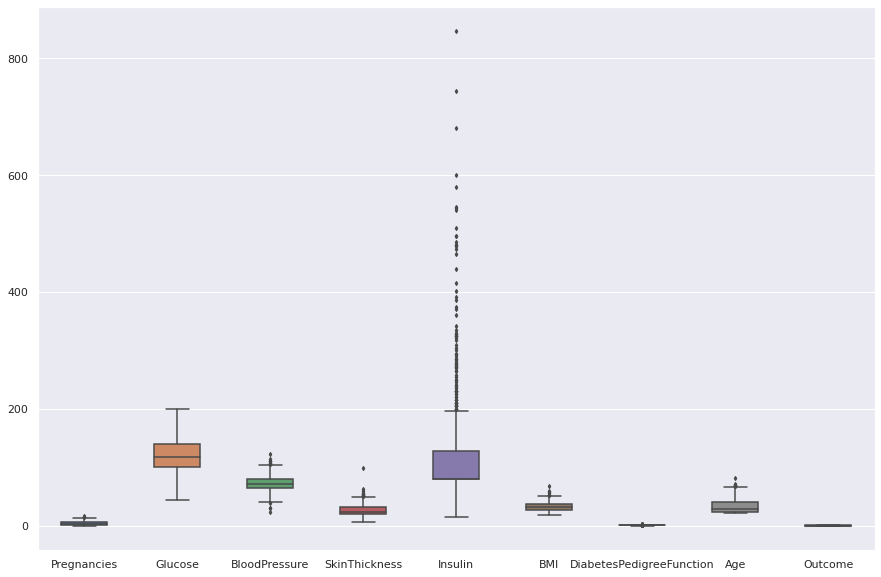

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, ax=ax, width=0.5, fliersize=3)

In [ ]:
def dataCleaner(df, dfval, qval):
  """ This function helpes to clean data by quantile value
      df = data frame
      dfval = data frame cloumn
      qval = quantile value
  """
  q = df[dfval].quantile(qval)
  cleaned_data = df[df[dfval] < q]
  return cleaned_data

In [ ]:
data_cleaned = dataCleaner(data, "Pregnancies", 0.98)
data_cleaned = dataCleaner(data, "BMI", 0.99)
data_cleaned = dataCleaner(data, "SkinThickness", 0.99)
data_cleaned = dataCleaner(data, "Age", 0.99)
data_cleaned = dataCleaner(data, "BloodPressure", 0.99)
data_cleaned = dataCleaner(data, "Insulin", 0.95)
data_cleaned = dataCleaner(data, "DiabetesPedigreeFunction", 0.99)

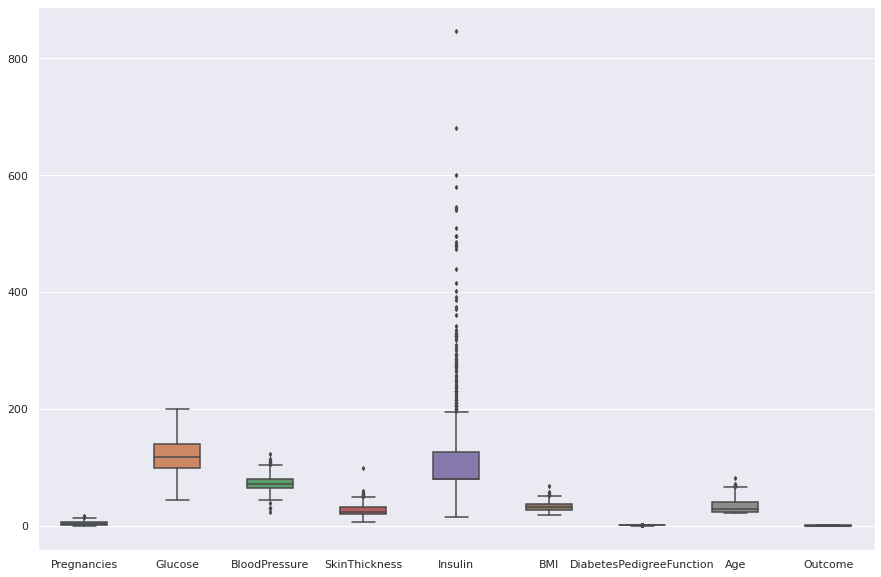

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, ax=ax, width=0.5, fliersize= 3)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


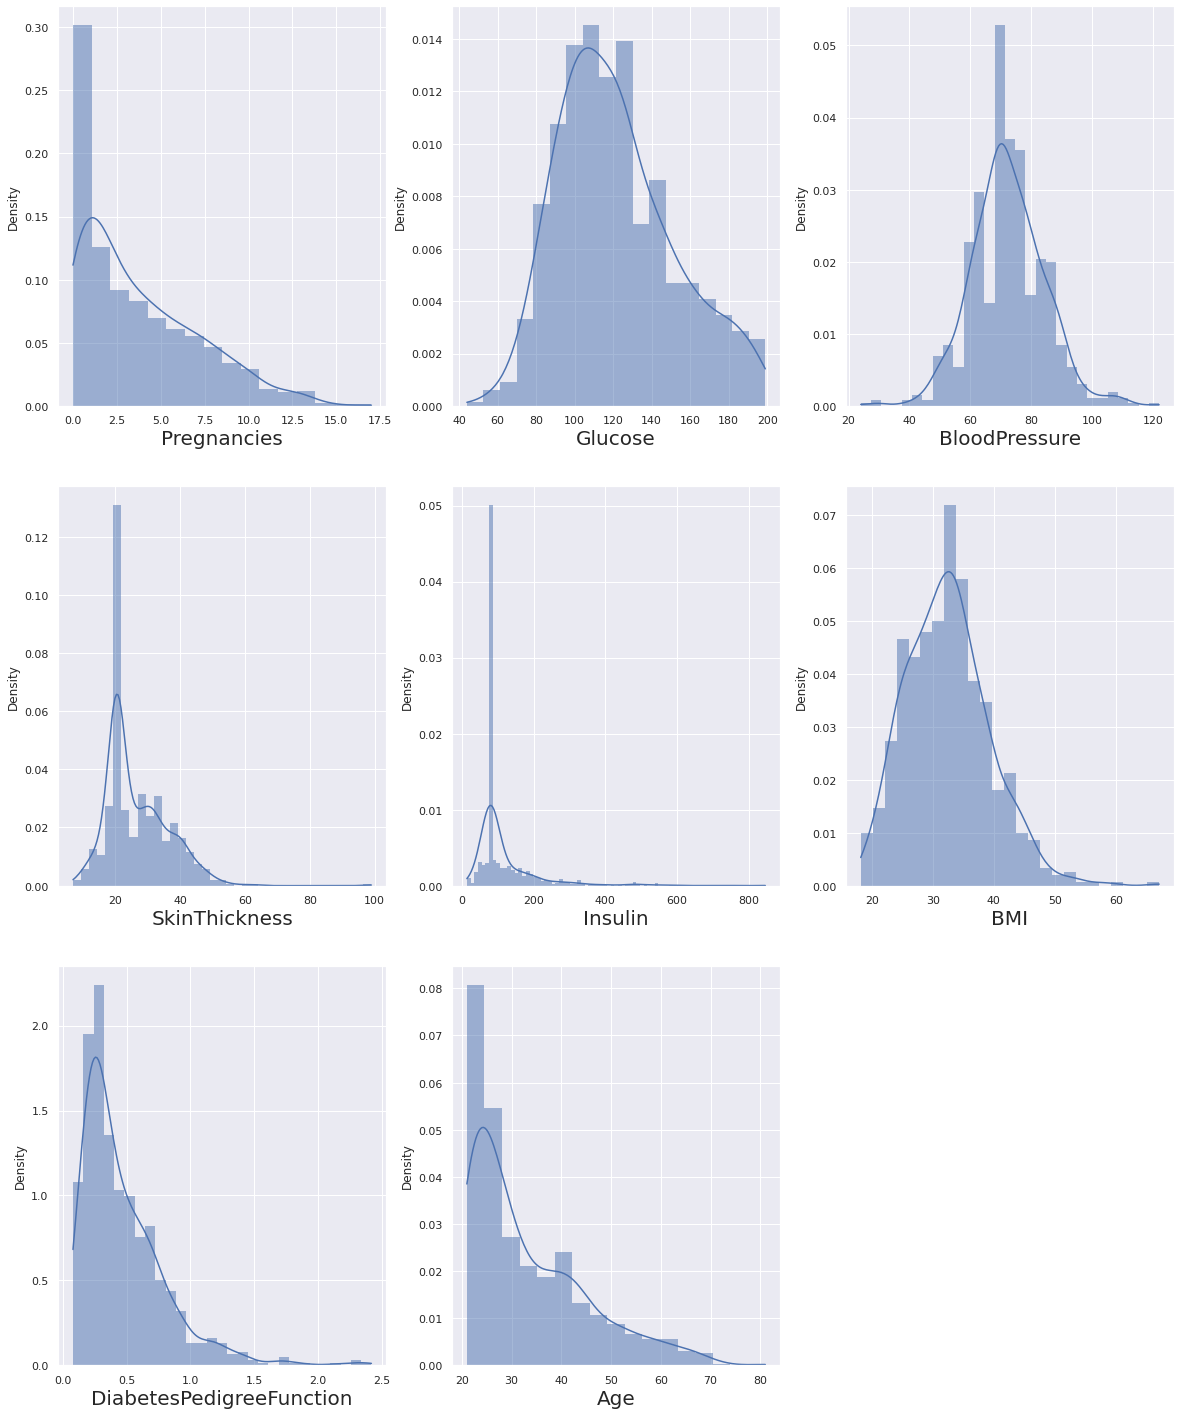

In [ ]:
plt.figure(figsize=(20, 25), facecolor='white')
plotNumber = 1

for column in data:
  if plotNumber < 9:
    ax = plt.subplot(3, 3, plotNumber)
    sns.histplot(data[column], kde=True, stat="density", linewidth=0)
    plt.xlabel(column, fontsize=20)
  plotNumber +=1
plt.show()

In [ ]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

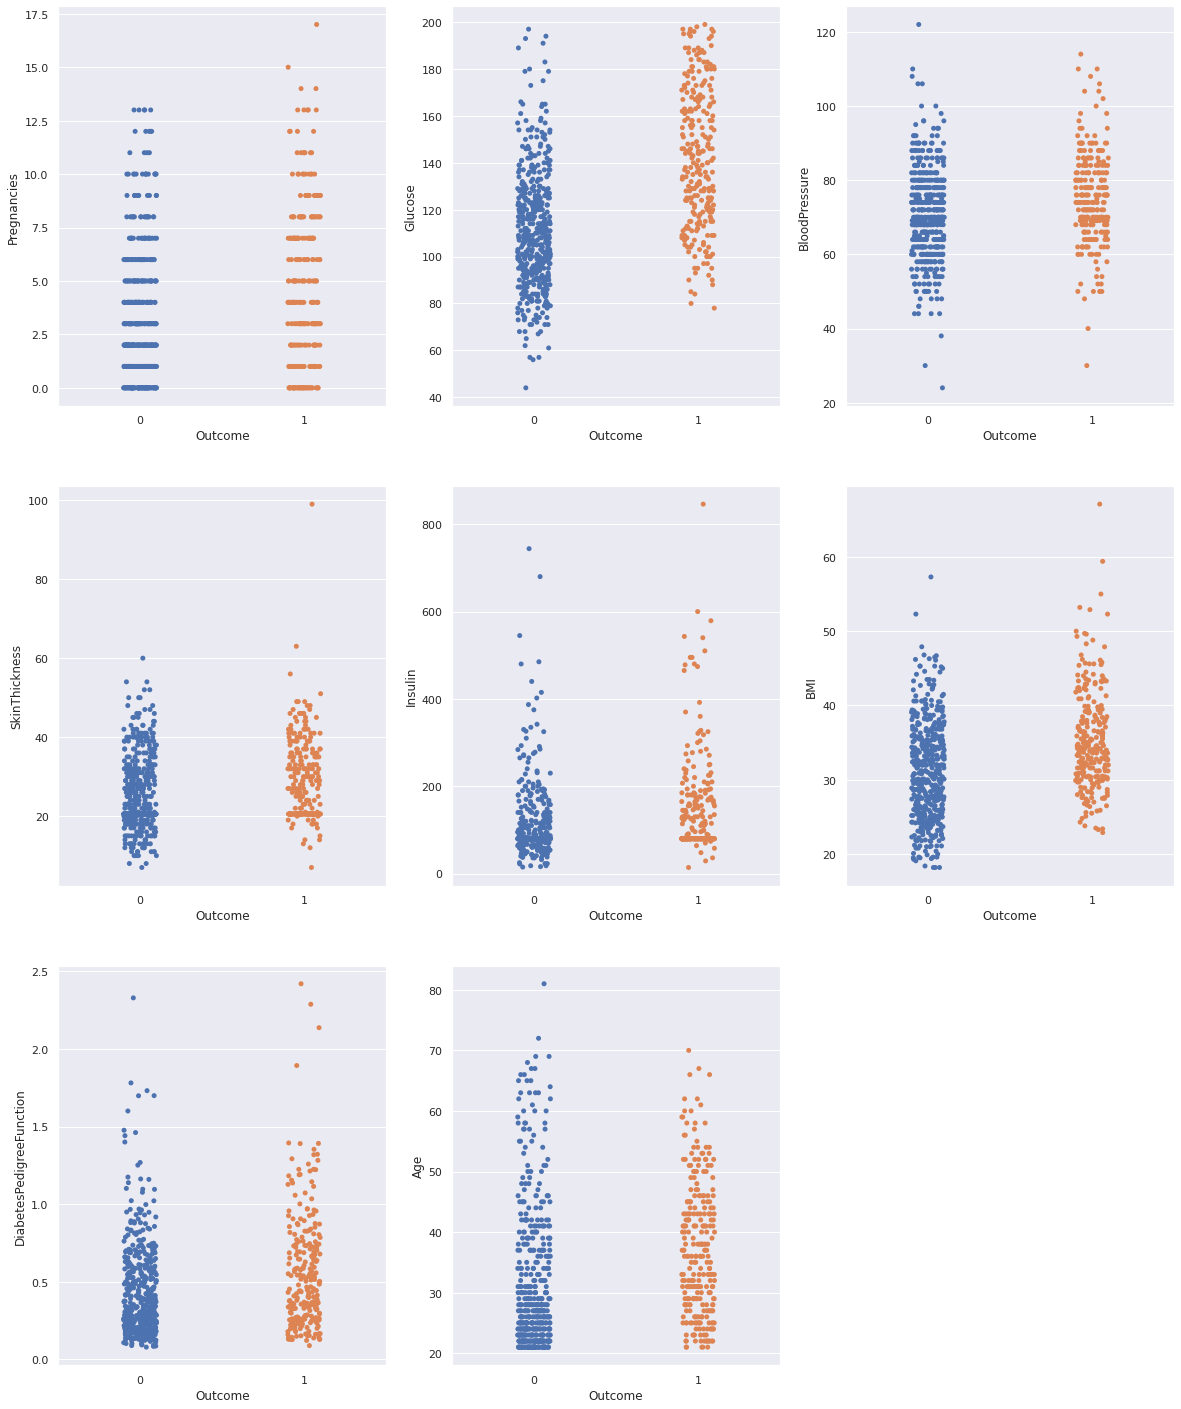

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(20, 25), facecolor='white')
plotNumber=1
for column in X:
  if plotNumber <=9:
    ax = plt.subplot(3, 3, plotNumber)
    sns.stripplot(y, X[column])
  plotNumber+=1
plt.show()

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [ ]:
vif = pd.DataFrame()
vif['vif'] =[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['fatures'] = X.columns

In [ ]:
vif

,vif,fatures
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
import pickle

with open("mdelForprediction.sav", 'wb') as f:
  pickle.dump(log_reg, f)
with open("StandardScaler.sav", 'wb') as f:
  pickle.dump(scaler, f)

In [ ]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [ ]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [ ]:
recall = true_positive / (true_positive+false_negative)
recall

0.7746478873239436

In [ ]:
F1_Score = 2*(recall * Precision) / (recall + Precision)
F1_Score

0.8239700374531835

In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

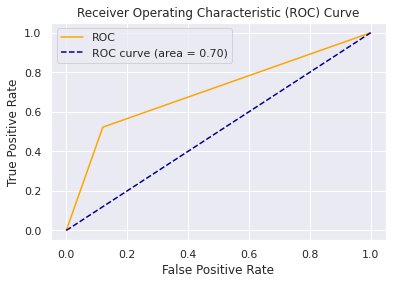

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()